In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('Hotel_Reviews.tsv', delimiter='\t', quoting=3)

In [3]:
df.shape

(1000, 2)

In [4]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# **Data Preprocessing**

In [7]:
# Importing essential libraries for performing Natural Language Processing on 'Hotel_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')


# In natural language processing, useless words (data), are referred to as stop words. 
from nltk.corpus import stopwords

# A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, 
# “retrieved”, “retrieves” reduce to the stem “retrieve”
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gurudevssutar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [9]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [10]:
# Creating the Bag of Words model

# Countvectorizer converts a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer
# max_features - This parameter is pretty self-explanatory. 
# The CountVectorizer will choose the words/features that occur most frequently to be in its' vocabulary and drop everything else
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [11]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
print(y)

[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 

# **Model Building**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
# Fitting Naive Bayes to the Training set
# The multinomial Naive Bayes classifier is suitable for classification with discrete features 
# (e.g., word counts for text classification).
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
# alpha value=1.0
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [18]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
# In the simplest terms, Precision is the ratio between the True Positives and all the Positives.
print("Precision score is: {}".format(round(score2,2)))
# The recall is the measure of our model correctly identifying True Positives. 
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 76.5%
Precision score is: 0.76
Recall score is: 0.79


In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[72, 25],
       [22, 81]], dtype=int64)

Text(69.0, 0.5, 'Actual values')

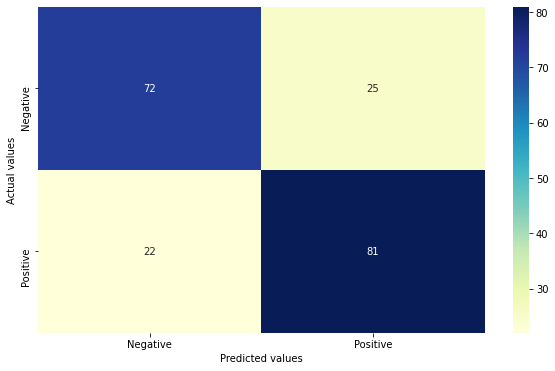

In [21]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [22]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
--------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [23]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

# **Predictions**

In [24]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [25]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [26]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [27]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
